In [72]:
#Use this to generate points on the circumference for Fuji dataset
#both training and testing images

import os
import json
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from circum import xy_values
import random

In [13]:
train = "/home/kiprono/Documents/STELLENBOSCH UNIVERISTY/Masters by Research\
/Mask RCNN/Annotation projects/ROBOTICS/train_images"
os.chdir(train)

In [14]:
with open("via_project_robotics.json","r") as file:
    data = file.read()

In [15]:
data = json.loads(data)

In [21]:
headers = ['filename', 'file_size', 'file_attributes', 'region_count', 'region_id',"shape",
       'region_shape_attributes', 'region_attributes']
meta_robotics = pd.DataFrame(columns=headers)
meta_robotics

,filename,file_size,file_attributes,region_count,region_id,shape,region_shape_attributes,region_attributes


In [17]:
i = 1
one = list(data.values())[i]
one



{'0001-1-10-0010.jpg925723': {'filename': '0001-1-10-0010.jpg',
  'size': 925723,
  'regions': [{'shape_attributes': {'name': 'circle',
     'cx': 1220,
     'cy': 223,
     'r': 78.062},
    'region_attributes': {}},
   {'shape_attributes': {'name': 'circle', 'cx': 1369, 'cy': 251, 'r': 52},
    'region_attributes': {}},
   {'shape_attributes': {'name': 'circle', 'cx': 1189, 'cy': 336, 'r': 67},
    'region_attributes': {}},
   {'shape_attributes': {'name': 'circle', 'cx': 1604, 'cy': 833, 'r': 76},
    'region_attributes': {}},
   {'shape_attributes': {'name': 'circle', 'cx': 1414, 'cy': 669, 'r': 70},
    'region_attributes': {}},
   {'shape_attributes': {'name': 'circle', 'cx': 1145, 'cy': 586, 'r': 54},
    'region_attributes': {}},
   {'shape_attributes': {'name': 'circle', 'cx': 1345, 'cy': 1011, 'r': 76},
    'region_attributes': {}},
   {'shape_attributes': {'name': 'circle', 'cx': 1335, 'cy': 1123, 'r': 79},
    'region_attributes': {}},
   {'shape_attributes': {'name': 'circ

In [18]:
i = 1
one = list((list(data.values())[1]).values())[i]
a = one["filename"] #filename
print(a)
b = one["size"] #file_size
print(b)
c = "{}" #file_attributes
d = len(one["regions"])#region_count
print(d)
g = "{}" #region_attributes
img = cv.imread(a)
one_df = pd.DataFrame(columns=headers)
for j in range(len(one["regions"])):
    xc = one["regions"][j]["shape_attributes"]["cx"]#xc
    yc = one["regions"][j]["shape_attributes"]["cy"]#yc
    r = one["regions"][j]["shape_attributes"]["r"]#radius
    t = {'name':'polygon','all_points_x':None,'all_points_y':None}
    x,y = xy_values(xc,yc,r,img.shape[1],img.shape[0])
    t['all_points_x']  = x
    t['all_points_y'] = y
    e = j #region_id
    f = t #region_shape_attributes
    row = [a,b,c,d,e,f,g]
    one_df.loc[j] = row
meta_robotics = pd.concat([meta_robotics,one_df],ignore_index=True)
meta_robotics

0001-1-25-0025.jpg
1953343
12


,filename,file_size,file_attributes,region_count,region_id,shaperegion_shape_attributes,region_attributes
0,0001-1-25-0025.jpg,1953343,{},12,0,"{'name': 'polygon', 'all_points_x': [1737, 173...",{}
1,0001-1-25-0025.jpg,1953343,{},12,1,"{'name': 'polygon', 'all_points_x': [1823, 182...",{}
2,0001-1-25-0025.jpg,1953343,{},12,2,"{'name': 'polygon', 'all_points_x': [1791, 179...",{}
3,0001-1-25-0025.jpg,1953343,{},12,3,"{'name': 'polygon', 'all_points_x': [1741, 174...",{}
4,0001-1-25-0025.jpg,1953343,{},12,4,"{'name': 'polygon', 'all_points_x': [1663, 166...",{}
5,0001-1-25-0025.jpg,1953343,{},12,5,"{'name': 'polygon', 'all_points_x': [1680, 167...",{}
6,0001-1-25-0025.jpg,1953343,{},12,6,"{'name': 'polygon', 'all_points_x': [1684, 168...",{}
7,0001-1-25-0025.jpg,1953343,{},12,7,"{'name': 'polygon', 'all_points_x': [1759, 175...",{}
8,0001-1-25-0025.jpg,1953343,{},12,8,"{'name': 'polygon', 'all_points_x': [1649, 164...",{}
9,0001-1-25-0025.jpg,1953343,{},12,9,"{'name': 'polygon', 'all_points_x': [1673, 167...",{}


## LOOP THROUGH ALL THE IMAGES

In [22]:
n = len(list((list(data.values())[1]).values()))
meta_robotics = pd.DataFrame(columns=headers)
meta_robotics

,filename,file_size,file_attributes,region_count,region_id,shape,region_shape_attributes,region_attributes


In [23]:
for i in range(n):
    one = list((list(data.values())[1]).values())[i]
    a = one["filename"] #filename
    b = one["size"] #file_size
    c = "{}" #file_attributes
    d = len(one["regions"])#region_count
    g = "{}" #region_attributes
    img = cv.imread(a)
    one_df = pd.DataFrame(columns=headers)
    for j in range(len(one["regions"])):
        xc = one["regions"][j]["shape_attributes"]["cx"]#xc
        yc = one["regions"][j]["shape_attributes"]["cy"]#yc
        r = one["regions"][j]["shape_attributes"]["r"]#radius
        t = {'name':'polygon','all_points_x':None,'all_points_y':None}
        x,y = xy_values(xc,yc,r,img.shape[1],img.shape[0])
        t['all_points_x']  = x
        t['all_points_y'] = y
        e = j #region_id
        f = t #region_shape_attributes
        shape_ = img.shape
        row = [a,b,c,d,e,shape_,f,g]
        one_df.loc[j] = row
    meta_robotics = pd.concat([meta_robotics,one_df],ignore_index=True)

In [24]:
meta_robotics

,filename,file_size,file_attributes,region_count,region_id,shape,region_shape_attributes,region_attributes
0,0001-1-10-0010.jpg,925723,{},12,0,"(1621, 1824, 3)","{'name': 'polygon', 'all_points_x': [1298, 129...",{}
1,0001-1-10-0010.jpg,925723,{},12,1,"(1621, 1824, 3)","{'name': 'polygon', 'all_points_x': [1421, 142...",{}
2,0001-1-10-0010.jpg,925723,{},12,2,"(1621, 1824, 3)","{'name': 'polygon', 'all_points_x': [1256, 125...",{}
3,0001-1-10-0010.jpg,925723,{},12,3,"(1621, 1824, 3)","{'name': 'polygon', 'all_points_x': [1680, 167...",{}
4,0001-1-10-0010.jpg,925723,{},12,4,"(1621, 1824, 3)","{'name': 'polygon', 'all_points_x': [1484, 148...",{}
5,0001-1-10-0010.jpg,925723,{},12,5,"(1621, 1824, 3)","{'name': 'polygon', 'all_points_x': [1199, 119...",{}
6,0001-1-10-0010.jpg,925723,{},12,6,"(1621, 1824, 3)","{'name': 'polygon', 'all_points_x': [1421, 142...",{}
7,0001-1-10-0010.jpg,925723,{},12,7,"(1621, 1824, 3)","{'name': 'polygon', 'all_points_x': [1414, 141...",{}
8,0001-1-10-0010.jpg,925723,{},12,8,"(1621, 1824, 3)","{'name': 'polygon', 'all_points_x': [1276, 127...",{}
9,0001-1-10-0010.jpg,925723,{},12,9,"(1621, 1824, 3)","{'name': 'polygon', 'all_points_x': [792, 791,...",{}


In [26]:
meta_robotics.to_csv("../robotics.csv",index=False)

## ROUGH SPACE

In [11]:
all_images = []
for i in range(254):
    one = list((list(data.values())[1]).values())[i]
    all_images.append(one["filename"])
    print(one["filename"])#filename

0001-1-10-0010.jpg
0001-1-25-0025.jpg
0001-1-49-0049.jpg
0001-1-62-0062.jpg
0001-1-118-0118.jpg
0001-1-119-0119.jpg
0001-1-128-0128.jpg
0001-1-169-0169.jpg
0001-1-187-0187.jpg
0001-2-39-0039.jpg
0001-2-55-0055.jpg
0001-2-82-0082.jpg
0001-2-95-0095.jpg
0001-11444-28-95.jpg
0001-11446-44-84.jpg
0001-11446-46-112.jpg
0001-11446-49-112.jpg
0001-11447-75-92.jpg
0001-11447-75-147.jpg
0001-11447-81-188.jpg
0001-11645-117-69.jpg
0001-11645-126-111.jpg
0001-11645-134-120.jpg
0001-11646-138-34.jpg
0001-11646-140-81.jpg
0001-11647-156-201.jpg
0001-11647-166-51.jpg
0001-12013-251-409.jpg
0001-12013-252-304.jpg
0001-12014-253-337.jpg
0001-12014-254-327.jpg
0001-12014-272-396.jpg
0001-12382-467-143.jpg
0001-12384-483-145.jpg
0001-12402-531-78.jpg
0001-12402-532-81.jpg
0001-12403-533-77.jpg
0001-12403-536-88.jpg
0001-12409-544-102.jpg
0002-1-10-0010.jpg
0002-1-62-0062.jpg
0002-1-92-0092.jpg
0002-1-118-0118.jpg
0002-1-119-0119.jpg
0002-1-128-0128.jpg
0002-1-131-0131.jpg
0002-1-169-0169.jpg
0002-1-187-

In [12]:
train = "/home/kiprono/Documents/STELLENBOSCH UNIVERISTY/Masters by Research\
/Mask RCNN/Annotation projects/ROBOTICS/train_images (copy)"
os.chdir(train)

FileNotFoundError: [Errno 2] No such file or directory: '/home/kiprono/Documents/STELLENBOSCH UNIVERISTY/Masters by Research/Mask RCNN/Annotation projects/ROBOTICS/train_images (copy)'

In [ ]:
for Dir,subDir,filesList in os.walk(os.getcwd()):
    for files in filesList:
        if files in all_images:
            pass
        else:
            print(files, files in all_images)
            os.remove(files)

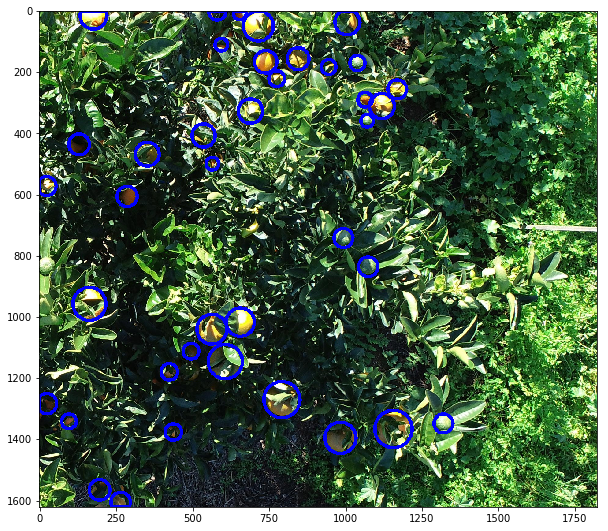

In [103]:
file = random.choice(list(meta_robotics["filename"].unique()))
example = (meta_robotics.loc[meta_robotics["filename"]==file]).reset_index(drop=True)
example
image = cv.imread(example.loc[1]["filename"])
try:
    for i in range(len(example)):
        a = example.loc[i]["region_shape_attributes"]
        x = a["all_points_x"]
        y = a["all_points_y"]
        pts = []
        for j,k in zip(x,y):
            pts.append([j,k])
        pts = np.array(pts)
        img = cv.polylines(image,[np.int32(pts)],isClosed=True,color=(255,0,0),thickness=10)

    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.figure(figsize=(10,10))
    plt.imshow(img)
except KeyError as s:
    print("No instance to display")

0001-1-25-0025.jpg


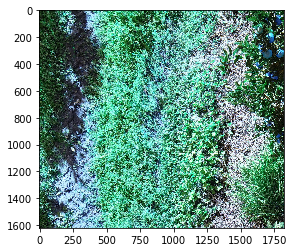

In [99]:
i = 22
a = meta_robotics.loc[i]["region_shape_attributes"]
print(meta_robotics.loc[i]["filename"])
a
image = cv.imread(meta_robotics.loc[i]["filename"])
plt.imshow(image)

In [48]:
x = a["all_points_x"]
y = a["all_points_y"]

In [49]:
pts = []
for i,j in zip(x,y):
    pts.append([i,j])

In [50]:
pts = np.array(pts)

In [51]:
img = cv.polylines(image,[np.int32(pts)],isClosed=True,color=(255,0,0),thickness=10)

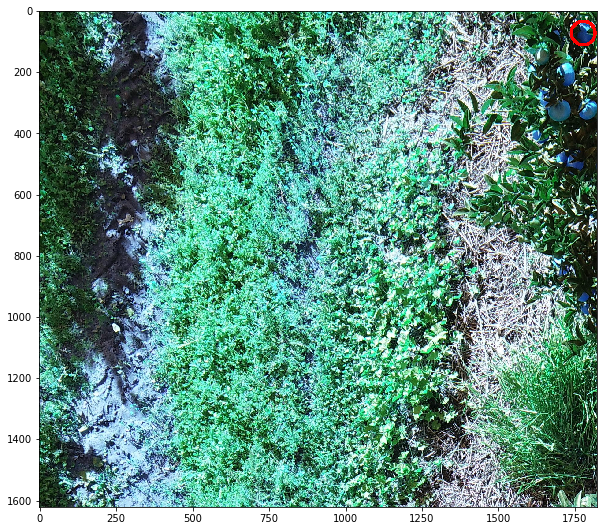

In [52]:
plt.figure(figsize=(10,10))
plt.imshow(img)